# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555


# Lecture 3
The following set of exercises are related to the Lecture 3.
## Adversarial Attack Simulation
Neural Networks are generally not robust and can be fooled easily. You will create adversarial examples using techniques like the Fast Gradient Sign Method (FGSM) and test these against a pretrained model to observe how the predictions change.

### (Basic)Exercise 1
For the basic part of this exercise you can use the starting code from [here](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm). The task is to use a different image and come up with smallest value of epsilon that completely change the prediction of the model.



In [31]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [32]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [33]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [34]:
'''
Adversarial Example Done with ZEBRA

image_path = "LecThreeAdditionalInfo/Zebra.jpg"
image_raw = tf.io.read_file(image_path)

# Convert Raw image into proper string or (tensor) arraw
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)
'''


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


In [43]:
# Adversarial Example Done with GoldFish

image_path = "LecThreeAdditionalInfo/Goldfish.jpeg"
image_raw = tf.io.read_file(image_path)

# Convert Raw image into proper string or (tensor) arraw
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


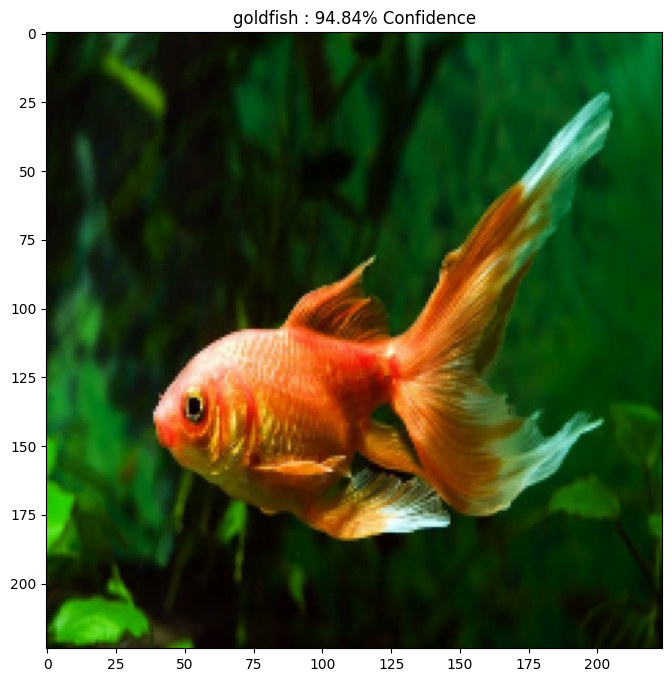

In [44]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

#### Creating adversarial image

In [45]:
loss_object = tf.keras.losses.CategoricalCrossentropy() #loss function for multi-classes

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    #tf.GradientTape() used to compute gradients of a function.

    #We instruct to watch to an image
    #i.e. watch --> Compute gradients with respect to this tensor
    tape.watch(input_image) 
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [37]:

#Adversarial Example Done with ZEBRA
'''
# Get the input label of the image.
zebra_retriever_index = 340 #https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57
label = tf.one_hot(zebra_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]
'''

In [48]:
#Adversarial Example Done with Goldfish

# Get the input label of the image.
goldfish_retriever_index = 340 #https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57
label = tf.one_hot(goldfish_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [49]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


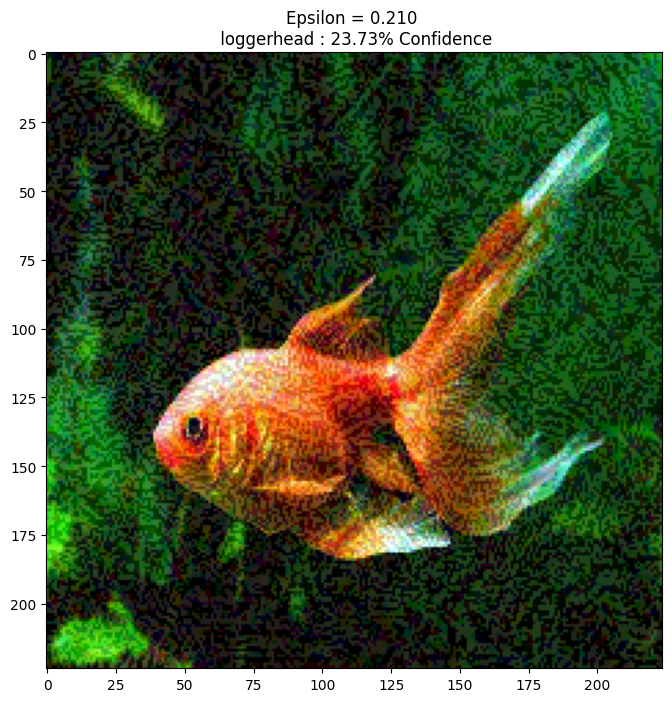

In [51]:
rangeList = range(0, 100, 1)
epsilons = [x/100 for x in rangeList]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input') for eps in epsilons]

'''
Note
By iteriating through different values of epsilons, we can observe of different values of perturbation affects the model 
'''

index = 0
while index < len(epsilons): #Ensuring we are not going outside our boundary
    adv_x = image + epsilons[index] * perturbations #Creating the advisary image by multiplying the epsilons * 
    adv_x = tf.clip_by_value(adv_x, -1, 1) #Ensuring the pixel values remain within the valid range
    _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x))
    if label != "goldfish": #Find the first label that is not equal to a goldfish and break the loop.
        display_images(adv_x, descriptions[index])
        break
    index += 1

### (Advanced) Exercise 2
Train your own neural network and make it robust against such attack specifically against FGSM.

To make our NN robust against such attacks, we will train our models with L2 regularization techniques.

In [40]:
# Your code here

## Compare Pixel Attribution Methods
Apply Saliency Maps, CAM, Grad-CAM, and SmoothGrad to a set of images and analyze the quality of the explanations provided by each method. Write a report discussing the strengths and weaknesses of each technique based on your observations.
###(Basic) Exercise 3
Implement the following techniques, you can use the existing implementaion availabe as a package [ominixai](https://opensource.salesforce.com/OmniXAI/latest/index.html). You are expected to compare the following methods:

- Saliency Maps: Implement a function to compute the saliency map.
- CAM: Implement a function to compute CAM.
- Grad-CAM: Implement a function to compute Grad-CAM.
- SmoothGrad: Implement a function to compute SmoothGrad.

### (Regular) Exercise 4

Create a function to display the original image alongside the saliency map, CAM, Grad-CAM, and SmoothGrad visualizations for comparison.
Display the visualizations for each image.
Analysis

### (Regular) Exercise 5
Compare the results. Some points to look for are:
- Which technique provides the most intuitive explanation.
- The strengths and weaknesses of each technique.
- Any observed differences in the explanations across different images.

## XAI For text Data
## (Advanced) Exercise 6
In this exercise you will work with text data. The only thing you have to do is to follow the steps of this [tuotorial](https://eli5.readthedocs.io/en/latest/tutorials/sklearn-text.html) and apply it to  a different dataset.

## DeepSHAP (DeepLift)


In [41]:
# imports for a deep learning model
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np

ModuleNotFoundError: No module named 'torch'

### (Regular)Exercise 7
Use the shap library and the provided starter code to explain the MNIST data set.

In [ ]:
# Train your own NN
# Use Shap
# display result

Used Resources
https://www.tensorflow.org/datasets/catalog/mnist
https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python
https://colab.research.google.com/github/Deep-Learning-Challenge/challenge-notebooks/blob/master/2.Convolutional%20Neural%20Networks/2.Guided%20Projects/1.Handwritten%20Digit%20Recognition.ipynb



In [69]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

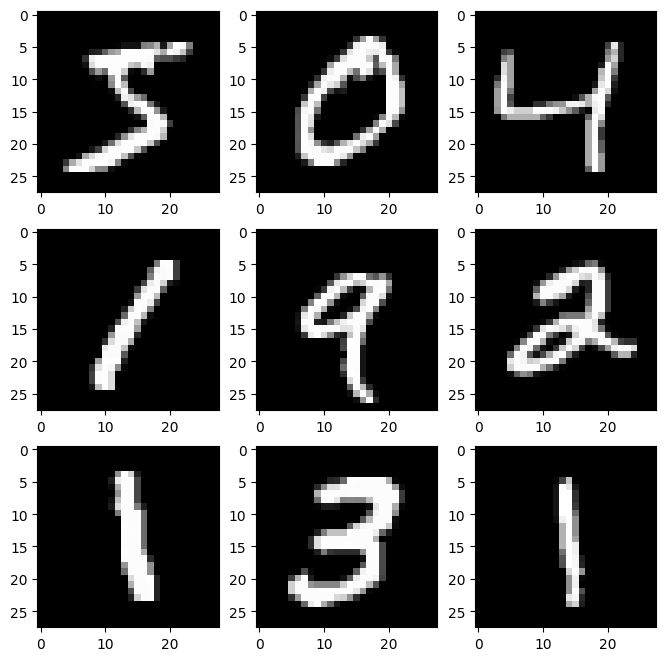

In [72]:
for i in range(9):
    plt.subplot(330 + 1 + i) #A number of rows in the grid, B = number of columns in the grid, C =index of the subplot within the grid
    plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    plt.show

#### Implementing a basic NN

In [73]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

In [74]:
seed = 7
numpy.random.seed(seed)

In [75]:
# flatten the images 28X28 to a vector by 784. THis is needed because our NN only accepts a 1D Vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [76]:
X_train = X_train / 255
X_test = X_test / 255

In [77]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [78]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [79]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


c:\Users\Hakan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 4s - 13ms/step - accuracy: 0.9197 - loss: 0.2826 - val_accuracy: 0.9593 - val_loss: 0.1387
Epoch 2/10
300/300 - 3s - 8ms/step - accuracy: 0.9676 - loss: 0.1132 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 3/10
300/300 - 3s - 8ms/step - accuracy: 0.9796 - loss: 0.0715 - val_accuracy: 0.9752 - val_loss: 0.0790
Epoch 4/10
300/300 - 2s - 8ms/step - accuracy: 0.9854 - loss: 0.0508 - val_accuracy: 0.9788 - val_loss: 0.0702
Epoch 5/10
300/300 - 2s - 8ms/step - accuracy: 0.9899 - loss: 0.0371 - val_accuracy: 0.9785 - val_loss: 0.0675
Epoch 6/10
300/300 - 3s - 9ms/step - accuracy: 0.9929 - loss: 0.0270 - val_accuracy: 0.9803 - val_loss: 0.0607
Epoch 7/10
300/300 - 3s - 9ms/step - accuracy: 0.9950 - loss: 0.0202 - val_accuracy: 0.9789 - val_loss: 0.0652
Epoch 8/10
300/300 - 3s - 9ms/step - accuracy: 0.9963 - loss: 0.0154 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 9/10
300/300 - 3s - 9ms/step - accuracy: 0.9980 - loss: 0.0105 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 10/10

### (Regular) Exercise 8
Explain what can be understood about the similarity of certain digits as seen by the machine learning model through the explanations.